In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_raw = pd.read_csv('Dataset1B.csv')
data = data_raw.drop(['average rating', 'growth (30 days)', 'growth (60 days)', 'price', 'category', '3 star ratings', 'paid'], axis=1)

In [4]:
data.head()

,rank,title,total ratings,installs,5 star ratings,4 star ratings,2 star ratings,1 star ratings
0,1,Garena Free Fire - The Cobra,80678661,500.0 M,61935712,4478738,1814999,9654037
1,2,PUBG MOBILE: Graffiti Prank,35971961,100.0 M,26670566,2109631,893674,4945478
2,3,Mobile Legends: Bang Bang,25836869,100.0 M,17850942,1796761,725429,4397640
3,4,Brawl Stars,17181659,100.0 M,12493668,1474319,383478,2088781
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14237554,100.0 M,9657878,2124544,375159,1045945


In [5]:
class ukuran:
    
    def __init__(self, dataset, column, interval):
        self.dataset = dataset
        self.data_col = dataset[column]
        self.column = column
        self.mean = self.data_col.mean()
        self.median = self.data_col.median()
        self.mode = interval_mode(self.data_col, interval)
        self.std_dev = self.data_col.std()
        self.var = self.std_dev ** 2
        self.q1, self.q3 = np.percentile(self.data_col, [25, 75])
        self.iqr = self.q3 - self.q1
        self.outlier = outliers(self.data_col, self.q1, self.q3)
        
    def histogram(self, n_bins, log_base):
        fig, ax = plt.subplots(figsize=(18, 9))
        if log_base == 0:
            plt.title(f"Histogram {self.column} Linear Scale")
        else:
            plt.title(f"Histogram {self.column} (Log scale base{log_base})")
        plt.grid()
        sns.histplot(self.data_col, ax=ax, bins=n_bins, log_scale=log_base)
#         plt.savefig(f"{self.column}_histogram_log{log_base}.png")
        
    def relative_frequency_histogram(self):
        weight = np.zeros_like(self.data_col.values) + 1. / self.data_col.size
        fig, ax = plt.subplots()
        plt.title(f"Relative Frequency Histogram ({self.column})")
        plt.grid()
        ax.hist(self.data_col, weights=weight )
        ax.set_xlabel(self.column)
        ax.set_ylabel('Relative Frequency')
#         plt.savefig(f"{self.column}_rf_histogram_.png")
    def boxplot(self, is_log):
        if is_log:
            fig, ax = plt.subplots(figsize=(30, 6))
            ax.set_xscale("log")
            plt.title(f"Boxplot {self.column} Log Scale")
            plt.grid()
            sns.boxplot(x=self.data_col, ax=ax)
#             plt.savefig(f"{self.column}_boxplot_log.png")
        elif is_log is False:
            fig, ax = plt.subplots(figsize=(30, 6))
            plt.title(f"Boxplot {self.column}")
            plt.grid()
            sns.boxplot(x=self.data_col, ax=ax)
#             plt.savefig(f"{self.column}_boxplot_.png")
    def describe_all(self):
        print(self.column)
        print(f"Rata - rata: {self.mean}")
        print(f"Median: {self.median}")
        print(f"Modus: {self.mode}")
        print(f"Variansi: {self.var}")
        print(f"Standar Deviasi: {self.std_dev}")
        print(f"Kuartil 1: {self.q1}")
        print(f"Kuartil 3: {self.q3}")
        print(f"Jarak Interkuartil: {self.iqr}")
        print(f"Pencilan:\n Low Outlier: {self.outlier[0]}\n"
              f"{len(self.outlier[0])} data in low outlier\n"
              f"High Outlier: {self.outlier[1]}\n"
              f"{len(self.outlier[1])} in high outlier")
    def pertanyaan_a(self, bound):
        installs_list = []
        avg_n = 0
        n = 0
        if self.column != 'int installs':
            print("pertanyaan A hanya untuk parameter installs!")
            return
        for index, i in self.dataset.iterrows():
            if i['int installs'] >= bound:
                installs_list.append(i['int installs'])
                avg_n += i['int installs']
                n += 1
        avg_target = avg_n / n
        
        if avg_target < self.mean:
            return -1 * avg_target / self.mean
        
        elif avg_target > self.mean:
            return avg_target / self.mean
        
    def pertanyaan_a_plot(self, end, n_datas, save, log_scale):
        start = int(self.mean)
        x_ax = np.linspace(start, end, n_datas)
        x_ax_log = np.logspace(np.log10(installs.mean), np.log10(max(installs.data_col)), n_datas, base=10)
        y_ax = []
        for i in x_ax:
            y_ax.append(self.pertanyaan_a(i))
        plt.grid()
        plt.title(f"Plot Pertanyaan Diskusi A\nNilai Keterpencilan")
        plt.xlabel(f"Batas keterpencilan")
        plt.ylabel(f"Nilai Keterpencilan")
        if log_scale:
            plt.plot(x_ax_log, y_ax)
        else:
            plt.plot(x_ax, y_ax)
        if save:
            plt.savefig(f"pertanyaan_a_plot.png")
    def pertanyaan_b(self):
        if self.column != 'total ratings':
            print('pertanyaan B hanya untuk parameter total ratings!')
            return
        number_of_indexes = len(self.data_col) / 1000
        n_o_i = int(number_of_indexes)
        upper_percentage = number_of_indexes - n_o_i
        in_between = self.data_col[n_o_i - 1] - self.data_col[n_o_i]
        print(f"{self.data_col[n_o_i - 1]} - {self.data_col[n_o_i]}")
        print(f"{self.data_col[n_o_i - 1]} - {upper_percentage} * {in_between}")
        bound = self.data_col[n_o_i - 1] - upper_percentage * in_between
        print(n_o_i, self.data_col[0:n_o_i])
        print(bound)

In [6]:
def install_to_int(install):
    val = 0
    if install[-1]=='M' or install[-1]=='m':
        val = float(install[0:len(install)-1]) * 1e6
    elif install[-1]=='K' or install[-1]=='k':
        val = float(install[0:len(install)-1]) * 1e3
    return int(val)

def is_between(a, b, n):
    if n >= a and n < b:
        return True
    return False


def interval_mode(data_column, interval):
    min_tr = min(data_column)
    max_tr = max(data_column)
    c = 0
    m_c = []
    while min_tr < max_tr:
        for i in data_column:
            next_bound = min_tr + interval
            if is_between(min_tr, next_bound, i):
                c+=1
        m_c.append([min_tr, next_bound, c])
        c = 0
        min_tr += interval
    cur_x = (0, 0, 0)
    for x in m_c:
        if x[2] > cur_x[2]:
            cur_x = x
#     print(f"Modus pada interval {cur_x[0]} sampai {cur_x[1]}\ndengan jumlah data {cur_x[2]}")
    return cur_x

def outliers(data, q1, q3):
    iqr = q3-q1
    low_outlier = []
    n_low_outlier = 0
    high_outlier = []
    n_high_outlier = 0
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    for i in data:
        if i < lower_bound:
            low_outlier.append(i)
            n_low_outlier += 1
        elif i > upper_bound:
            high_outlier.append(i)
            n_high_outlier += 1
    return low_outlier, high_outlier

In [7]:
great = []
poor = []
installs_int = []

for game in range(len(data)):
    great.append(data['5 star ratings'][game] + data['4 star ratings'][game])
    poor.append(data['2 star ratings'][game] + data['1 star ratings'][game])
    installs_int.append(install_to_int(data['installs'][game]))
    
data['great'] = great
data['poor'] = poor
data['int installs'] = installs_int

In [8]:
rating_index = []
tr_inst_index = []
final_game_score = []

for score in range(len(data)):
    ri = data['great'][score] / data['poor'][score]
    trii = data['total ratings'][score] * data['int installs'][score]
    rating_index.append(ri)
    tr_inst_index.append(trii)
    final_game_score.append(trii * ri)

data['rating index'] = rating_index
data['total ratings and installs index'] = tr_inst_index
data['final game score'] = final_game_score

# Total Ratings

In [9]:
total_ratings = ukuran(data, 'total ratings', 100_000)
total_ratings.describe_all()

total ratings
Rata - rata: 1101181.5410404624
Median: 457675.0
Modus: [38238, 138238, 311]
Variansi: 10967611812693.422
Standar Deviasi: 3311738.4879687317
Kuartil 1: 187998.75
Kuartil 3: 944334.25
Jarak Interkuartil: 756335.5
Pencilan:
 Low Outlier: []
0 data in low outlier
High Outlier: [80678661, 35971961, 25836869, 17181659, 14237554, 14048931, 13020115, 11298789, 9554877, 7392911, 6475640, 6203689, 5651287, 5245027, 4457338, 4456347, 4448938, 4443546, 4260419, 4193941, 4162892, 4097530, 4092418, 3986647, 3480214, 3138199, 3122764, 3095661, 3065898, 3009445, 2644544, 2548363, 2535575, 2454177, 2373080, 2360988, 2346568, 2251406, 2128244, 2080344, 20649769, 14401261, 4262608, 2554945, 2183778, 35305263, 7141044, 6894310, 5855907, 5683301, 5347039, 5324391, 4908222, 4744985, 4570599, 4509959, 3999232, 3380525, 3195259, 2871537, 2292938, 7048207, 2445882, 2418516, 2095571, 2563915, 30859251, 16715691, 12866276, 11955303, 11449723, 10647190, 10561106, 9950630, 9014495, 8202126, 8005959

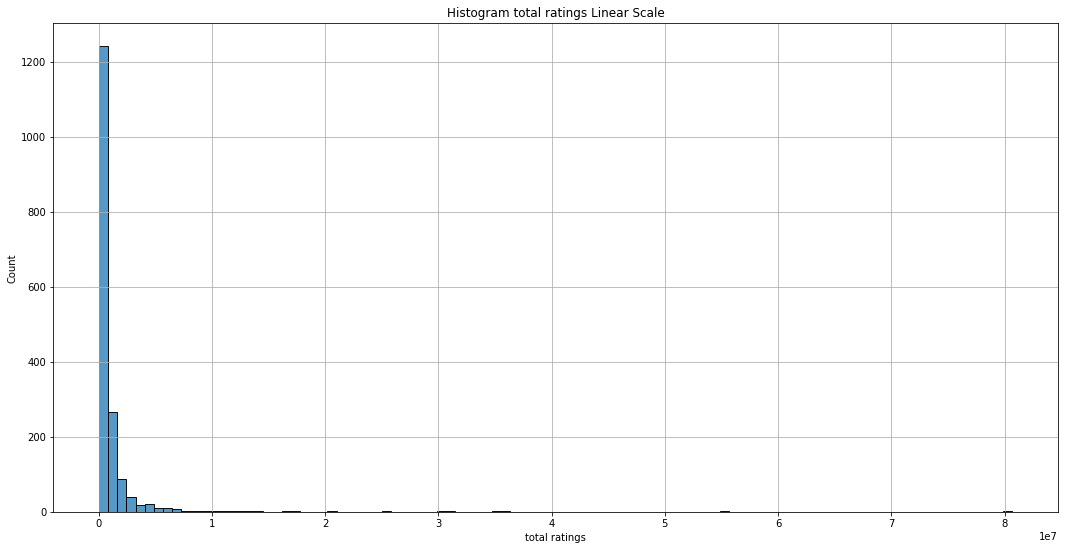

In [37]:
total_ratings.histogram(100, 0)

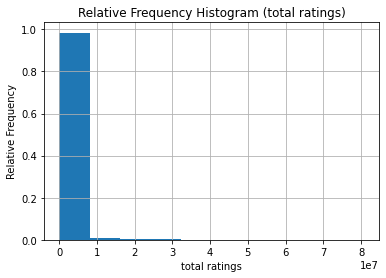

In [38]:
total_ratings.relative_frequency_histogram()

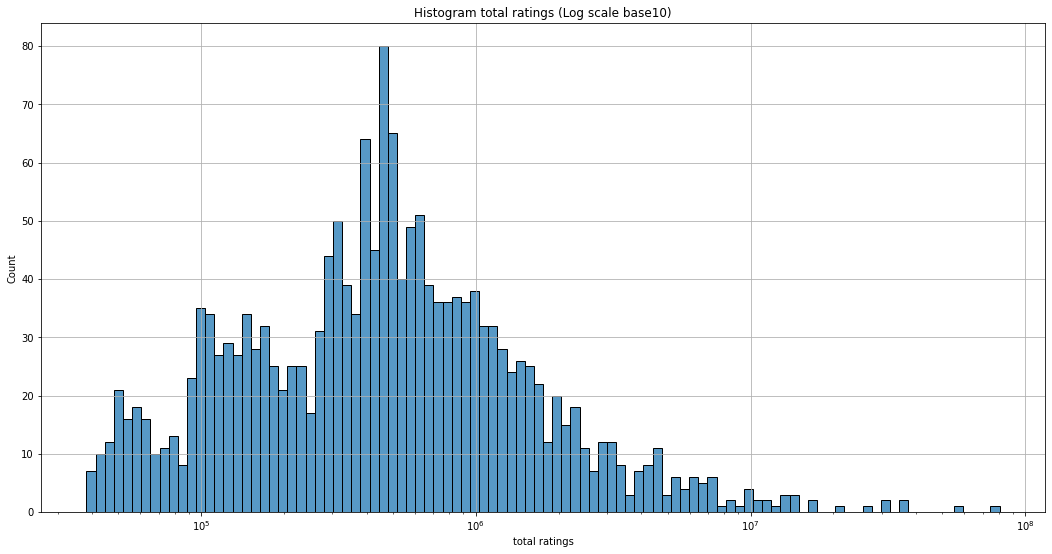

In [39]:
total_ratings.histogram(100, 10)

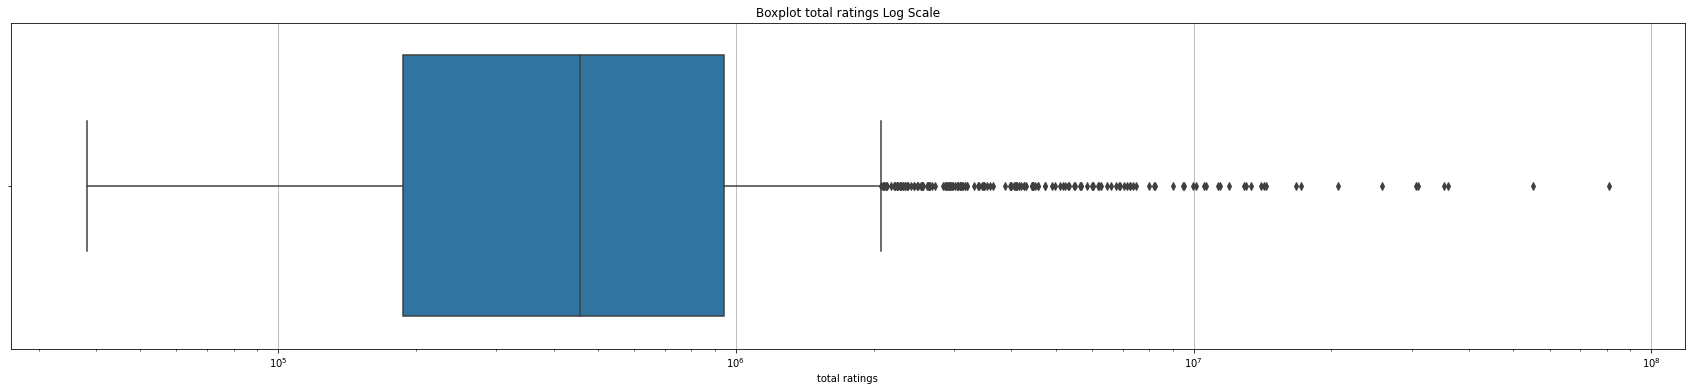

In [40]:
total_ratings.boxplot(is_log=True)

# Installs

In [119]:
installs = ukuran(data, 'int installs', 100_000)
installs.describe_all()

int installs
Rata - rata: 28894624.27745665
Median: 10000000.0
Modus: [10000000, 10100000, 795]
Variansi: 3375661341819422.0
Standar Deviasi: 58100441.83841825
Kuartil 1: 5000000.0
Kuartil 3: 50000000.0
Jarak Interkuartil: 45000000.0
Pencilan:
 Low Outlier: []
0 data in low outlier
High Outlier: [500000000, 500000000, 1000000000, 500000000, 500000000, 1000000000, 500000000, 500000000, 500000000, 500000000, 500000000, 500000000]
12 in high outlier


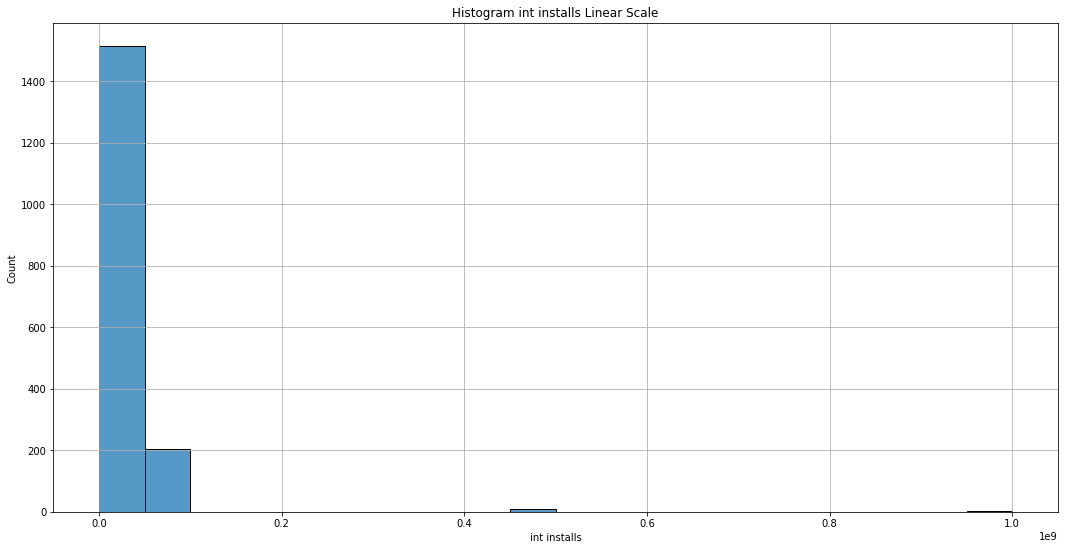

In [42]:
installs.histogram(20, 0)

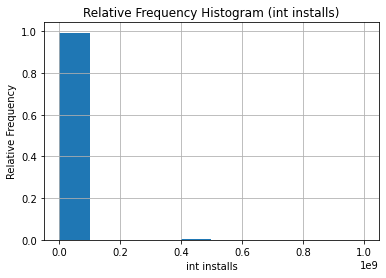

In [43]:
installs.relative_frequency_histogram()

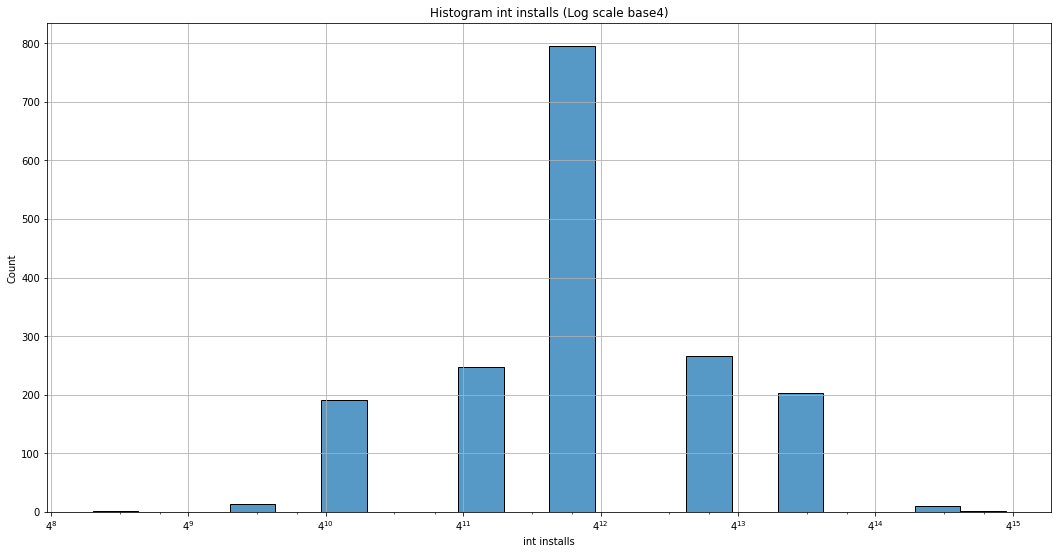

In [44]:
installs.histogram(20, 4)

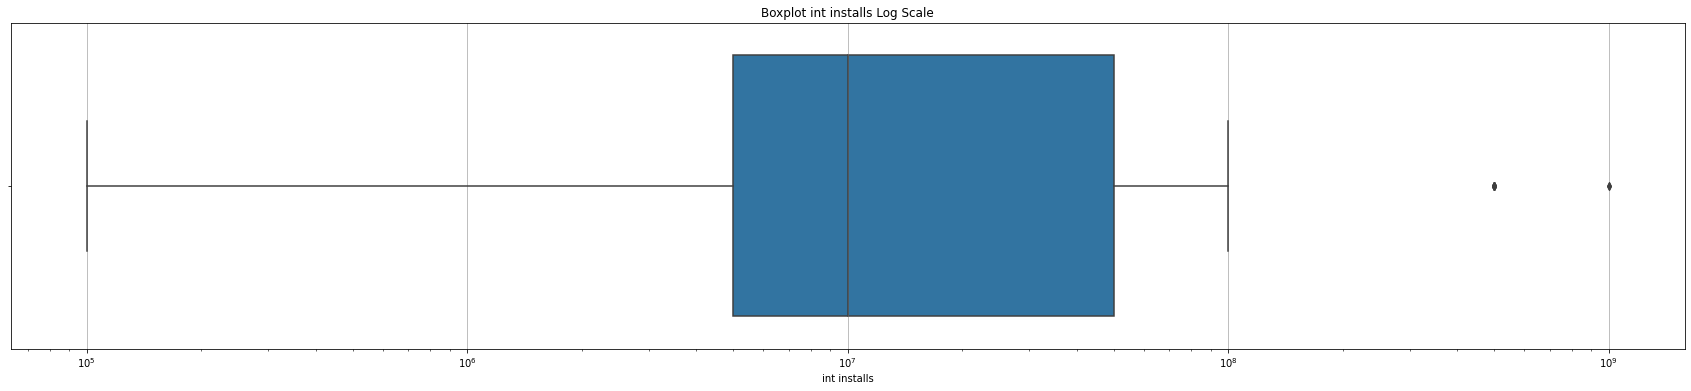

In [45]:
installs.boxplot(is_log=True)

# Great

In [65]:
great = ukuran(data, 'great', 10_000)
great.describe_all()

great
Rata - rata: 910030.3271676301
Median: 367617.0
Modus: [36635, 46635, 52]
Variansi: 7625611211070.817
Standar Deviasi: 2761450.9249796234
Kuartil 1: 157423.25
Kuartil 3: 775977.75
Jarak Interkuartil: 618554.5
Pencilan:
 Low Outlier: []
0 data in low outlier
High Outlier: [66414450, 28780197, 19647703, 13967987, 11782422, 12494069, 11290251, 7200446, 7517492, 5725584, 4855113, 5064146, 4379880, 4634977, 3946762, 3953320, 3965560, 3427875, 3196860, 3085000, 3294348, 2931171, 3442542, 3393187, 2772997, 2373405, 2736532, 2463096, 2361474, 2511679, 2204042, 2028367, 2129965, 2117690, 1848210, 2059925, 2040474, 1801962, 1763160, 1783304, 17893894, 11030246, 3707022, 2053854, 1919805, 30217975, 5963316, 5580160, 4859040, 4891903, 4326487, 4755912, 4240565, 3553933, 3941182, 3697310, 3527760, 2753685, 2593165, 2281776, 1959850, 1820951, 5740539, 2225424, 1887573, 1747276, 2115772, 27650030, 13763012, 10106569, 10114868, 9211082, 8999071, 8878769, 8317818, 8187660, 6581178, 7132942, 58151

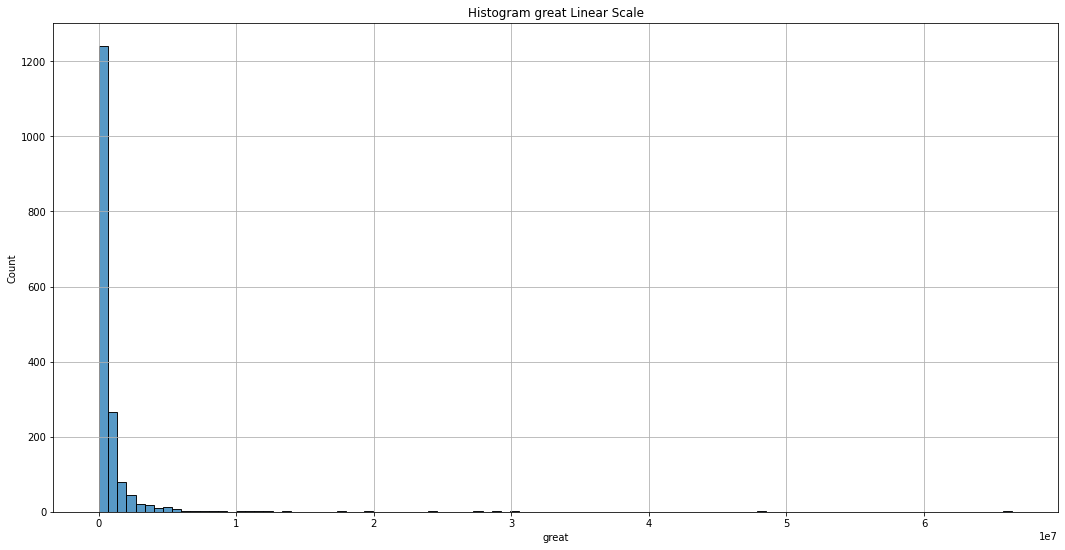

In [47]:
great.histogram(100, 0)

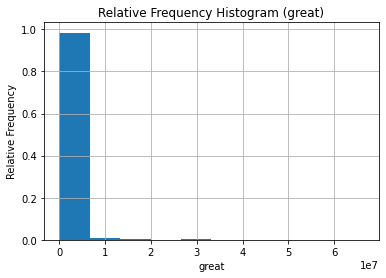

In [48]:
great.relative_frequency_histogram()

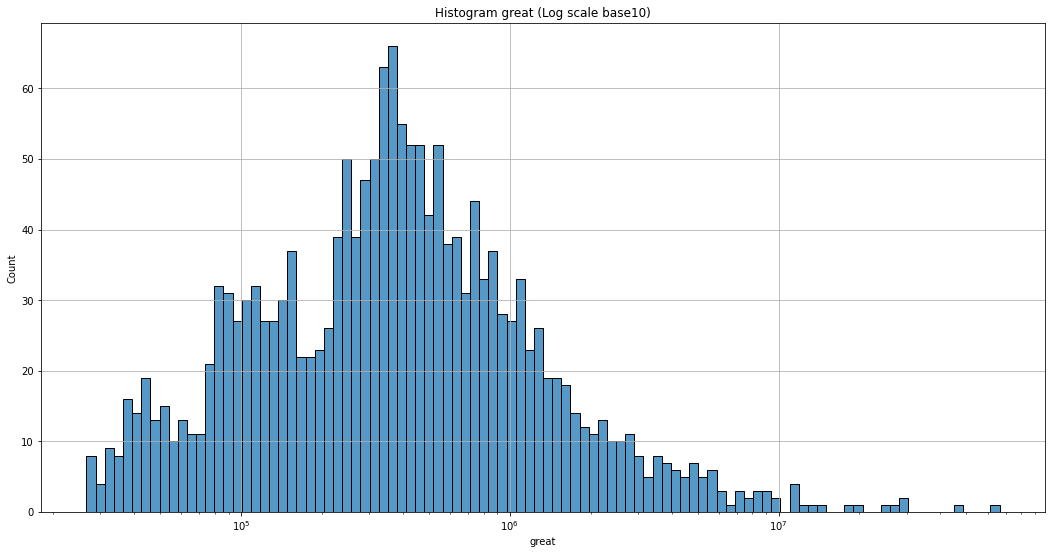

In [49]:
great.histogram(100, 10)

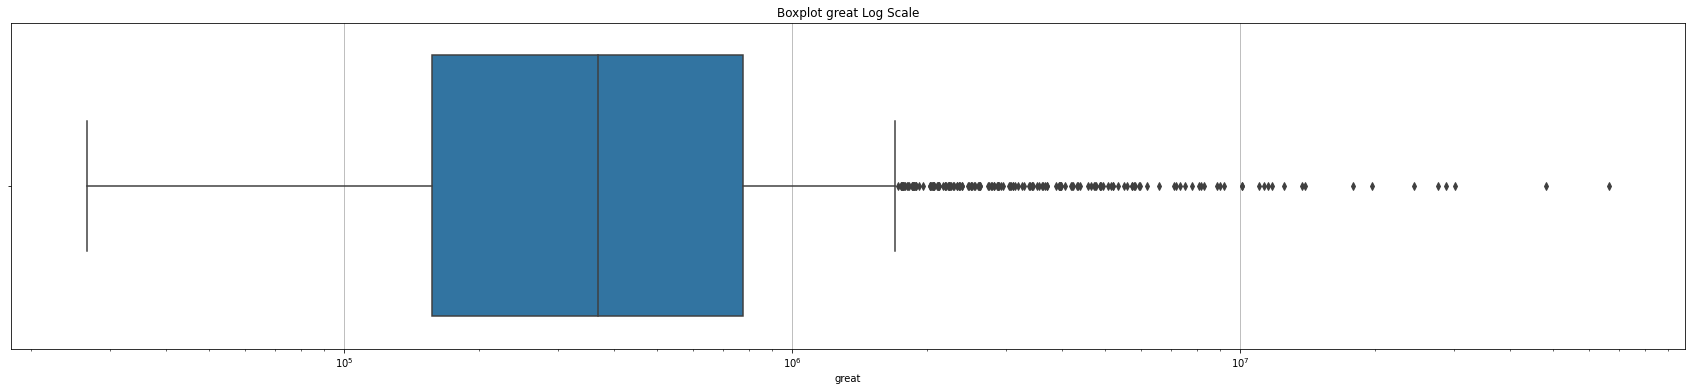

In [50]:
great.boxplot(is_log=True)

# Poor

In [66]:
poor = ukuran(data, 'poor', 10_000)
poor.describe_all()

poor
Rata - rata: 131598.83468208092
Median: 47221.5
Modus: [815, 10815, 254]
Variansi: 188561019782.99524
Standar Deviasi: 434236.1336680715
Kuartil 1: 18421.5
Kuartil 3: 111270.0
Jarak Interkuartil: 92848.5
Pencilan:
 Low Outlier: []
0 data in low outlier
High Outlier: [11469036, 5839152, 5123069, 2472259, 1421104, 1106675, 1241568, 3327766, 1421838, 1323444, 1133710, 825629, 950220, 394038, 386659, 270082, 256367, 816975, 725006, 846609, 617454, 878189, 436567, 351063, 490957, 577219, 454238, 532931, 355622, 308835, 393287, 290933, 376162, 319463, 374377, 483294, 264361, 316285, 364035, 432614, 258980, 259929, 270735, 355164, 413241, 264756, 290663, 2002778, 2485779, 339100, 301621, 443965, 296202, 273317, 323318, 3468825, 774520, 885037, 652323, 474255, 666595, 353073, 398022, 872462, 372515, 524481, 332787, 426131, 451581, 301356, 332182, 415867, 388369, 268077, 317801, 264690, 311507, 948726, 453627, 271952, 650662, 501091, 337918, 1724367, 2106690, 2120498, 1238150, 1546876, 110

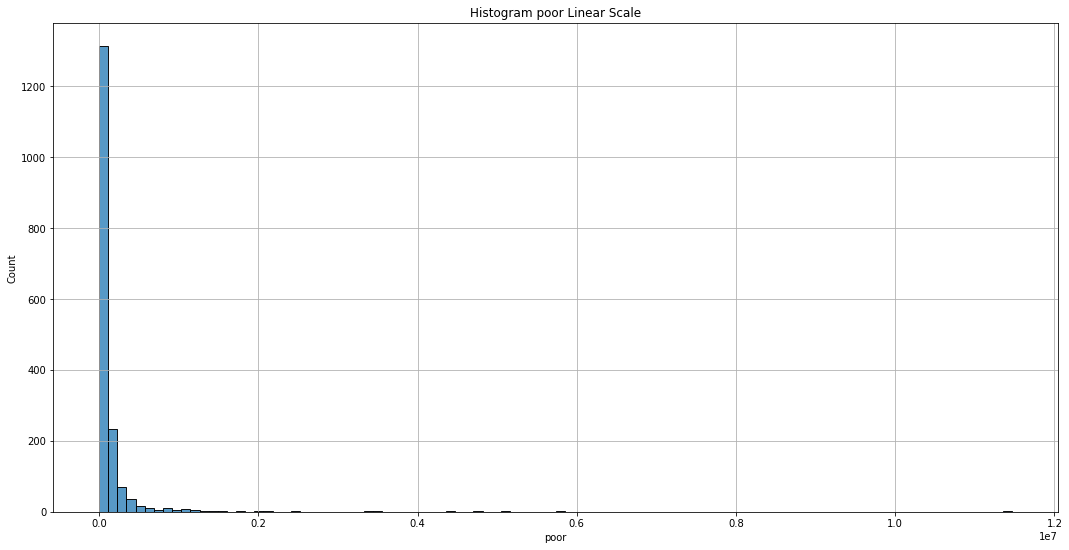

In [52]:
poor.histogram(100, 0)

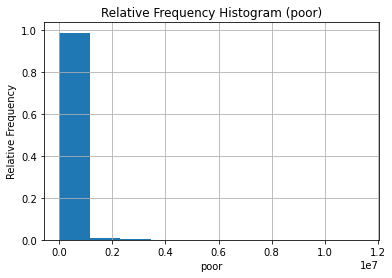

In [53]:
poor.relative_frequency_histogram()

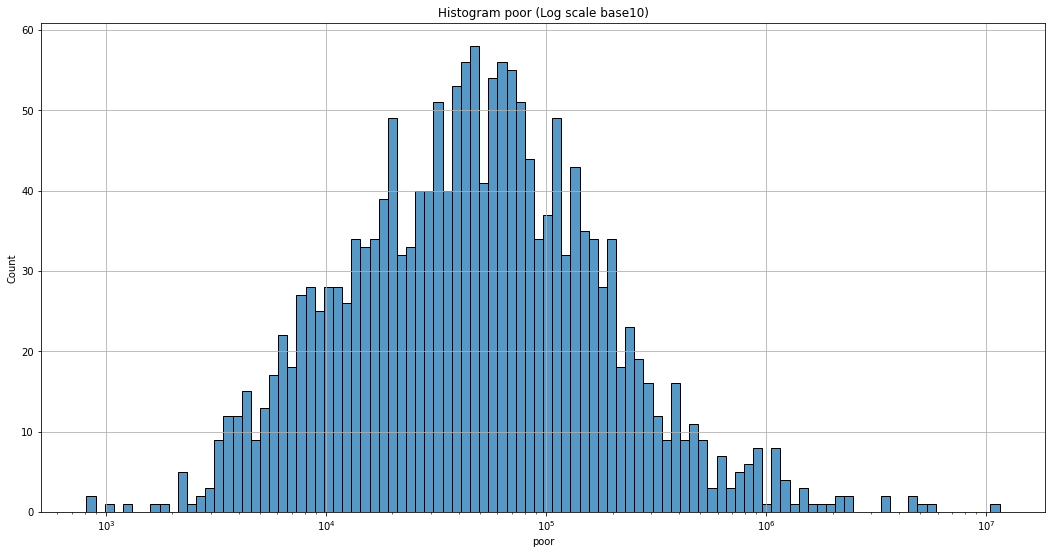

In [54]:
poor.histogram(100, 10)

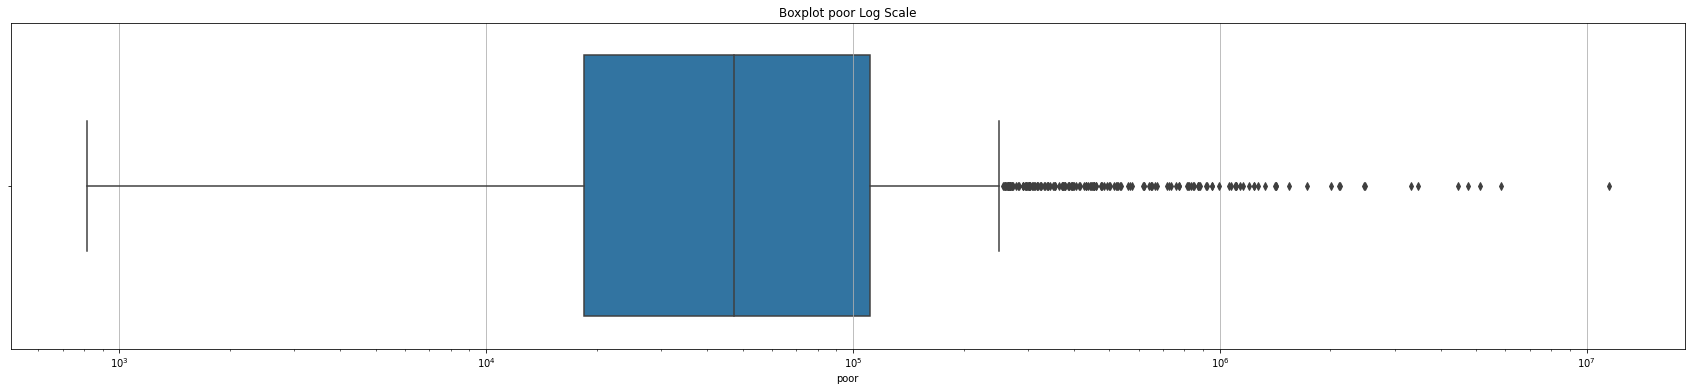

In [55]:
poor.boxplot(is_log=True)

### Pertanyaan Diskusi A

In [121]:
installs.pertanyaan_a(100_000_000 + 1)

20.188299655048475

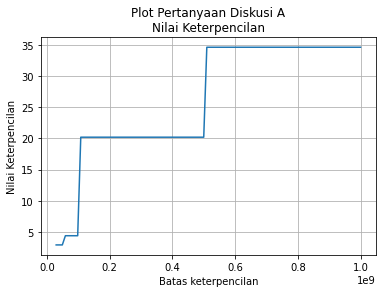

In [122]:
installs.pertanyaan_a_plot(max(installs.data_col), 100, save=False, log_scale=False)

### Pertanyaan Diskusi B

In [29]:
total_ratings.pertanyaan_b()

80678661 - 35971961
80678661 - 0.73 * 44706700
1 0    80678661
Name: total ratings, dtype: int64
48042770.0


### Pertanyaan Diskusi C

In [30]:
data_final = data.sort_values(by='final game score', ascending=False)

In [31]:
data_final.head()

,rank,title,total ratings,installs,5 star ratings,4 star ratings,2 star ratings,1 star ratings,great,poor,int installs,rating index,total ratings and installs index,final game score
622,1,Candy Crush Saga,30859251,1000.0 M,23521533,4128497,457810,1266557,27650030,1724367,1000000000,16.034887,30859251000000000,4.948246e+17
200,1,Subway Surfers,35305263,1000.0 M,26840330,3377645,801027,2667798,30217975,3468825,1000000000,8.711300,35305263000000000,3.075547e+17
1424,1,Clash of Clans,55170976,500.0 M,42736445,5397273,978099,3773793,48133718,4751892,500000000,10.129380,27585488000000000,2.794239e+17
0,1,Garena Free Fire - The Cobra,80678661,500.0 M,61935712,4478738,1814999,9654037,66414450,11469036,500000000,5.790761,40339330500000000,2.335954e+17
623,2,My Talking Tom,16715691,500.0 M,12245585,1517427,445084,1661606,13763012,2106690,500000000,6.533003,8357845500000000,5.460183e+16
